,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Image
0,807f93872b7e9fd36b6d086c6cbecf6b.png,RGB,JPEG,3,0.05,710,1066,C:\Py\Lab4Images\807f93872b7e9fd36b6d086c6cbecf6b.png,
1,akita-5964180_640.jpg,RGB,JPEG,3,0.09,640,426,C:\Py\Lab4Images\akita-5964180_640.jpg,
2,animal-3786987_640.jpg,RGB,JPEG,3,0.04,640,427,C:\Py\Lab4Images\animal-3786987_640.jpg,
3,dachshund-1519374_640.jpg,RGB,JPEG,3,0.08,640,485,C:\Py\Lab4Images\dachshund-1519374_640.jpg,
4,doberman-1334497_640.jpg,RGB,JPEG,3,0.06,640,443,C:\Py\Lab4Images\doberman-1334497_640.jpg,
5,dog-4465690_640.jpg,RGB,JPEG,3,0.04,640,424,C:\Py\Lab4Images\dog-4465690_640.jpg,
6,dog-5519360_640.jpg,RGB,JPEG,3,0.03,640,480,C:\Py\Lab4Images\dog-5519360_640.jpg,
7,husky-3380548_640.jpg,RGB,JPEG,3,0.10,640,585,C:\Py\Lab4Images\husky-3380548_640.jpg,
8,OIF.jpg,RGB,JPEG,3,0.01,328,198,C:\Py\Lab4Images\OIF.jpg,
9,OIP (1).jpg,RGB,JPEG,3,0.01,350,198,C:\Py\Lab4Images\OIP (1).jpg,

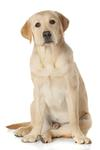
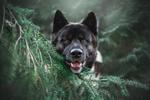
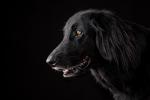
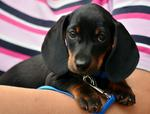
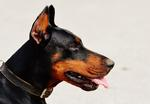
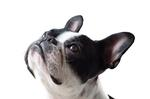
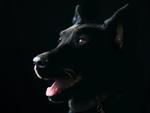
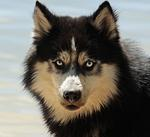
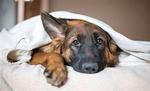
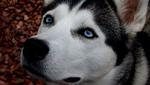
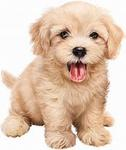
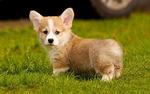
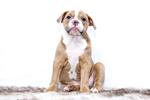
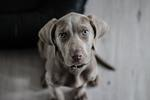
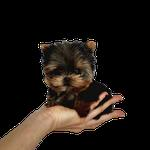

In [1]:
import os
import glob
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML

def create_thumbnail(image_path):
    image = Image.open(image_path)
    image.thumbnail((150, 150), Image.LANCZOS)
    return image

def image_to_base64(image):
    if isinstance(image, str):
        image = create_thumbnail(image)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    buffer = BytesIO()
    image.save(buffer, format='JPEG')
    encoded_string = base64.b64encode(buffer.getvalue()).decode()
    return encoded_string

def format_image_html(image):
    encoded_string = image_to_base64(image)
    return f'<img src="data:image/jpeg;base64,{encoded_string}">'

def collect_image_data(directory):
    data = []
    for file_path in glob.glob(os.path.join(directory, '*')):
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                img_format = img.format
                channel_count = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(file_path)
                data.append({
                    'File Name': file_name,
                    'Color Model': color_model,
                    'Format': img_format,
                    'Channels': channel_count,
                    'File Size (MB)': file_size,
                    'Width': width,
                    'Height': height,
                    'Full Path': full_path,
                    'Image': file_path
                })
        except Exception:
            continue
    return pd.DataFrame(data)

image_directory = r'C:\Py\Lab4Images'
images_df = collect_image_data(image_directory)
display(HTML(images_df.to_html(formatters={'Image': format_image_html}, escape=False)))


In [2]:
from PIL import Image, ImageOps
import os
import random

def apply_color_overlay(image, color):
    color_overlays = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "magenta": (255, 0, 255),
        "cyan": (0, 255, 255),
    }
    image = image.convert("RGB")
    overlay = Image.new("RGB", image.size, color_overlays[color])
    return Image.blend(image, overlay, alpha=0.4)

def square_crop(image):
    size = min(image.size)
    left = (image.width - size) // 2
    top = (image.height - size) // 2
    right = left + size
    bottom = top + size
    return image.crop((left, top, right, bottom))

def generate_poster(input_dir, output_path, a, b, img_size=250):
    img_files = [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.lower().endswith((".png", ".jpg", ".jpeg"))
    ]    
    total_img_needed = a * b
    if len(img_files) < total_img_needed:
        raise ValueError(f"Недостатньо зображень. Потрібно: {total_img_needed}, знайдено: {len(img_files)}.")
    
    poster_w = a * img_size
    poster_h = b * img_size
    poster = Image.new("RGB", (poster_w, poster_h))
    
    for row in range(b):
        for col in range(a):
            chosen_img = random.choice(img_files)
            with Image.open(chosen_img) as image:
                image = square_crop(image)
                image = image.resize((img_size, img_size))
                overlay_color = random.choice(["red", "green", "blue", "yellow", "magenta", "cyan"])
                image = apply_color_overlay(image, overlay_color)
                poster.paste(image, (col * img_size, row * img_size))
    
    poster.save(output_path)
    return poster

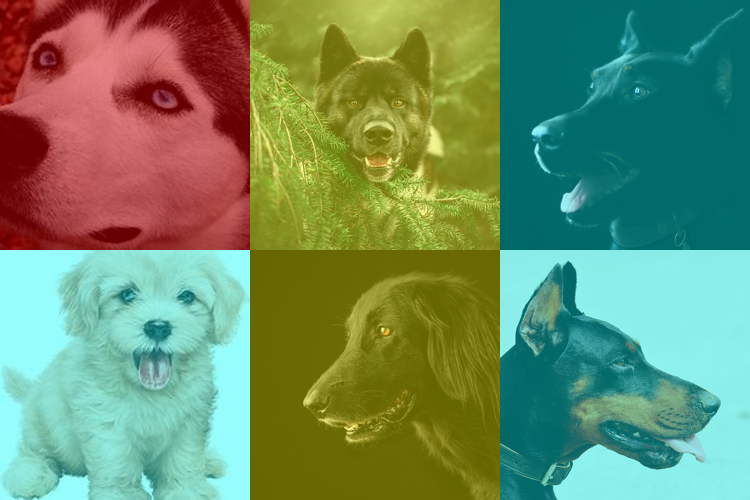

In [3]:
generate_poster(r'C:\Py\Lab4Images', "poster3x2.png", 3, 2)

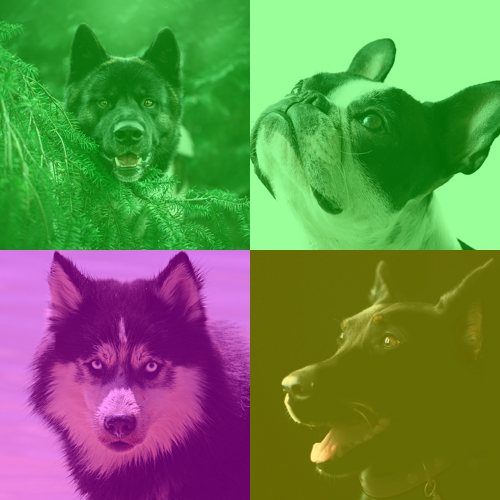

In [7]:
generate_poster(r'C:\Py\Lab4Images', "poster3x2.png", 2, 2)

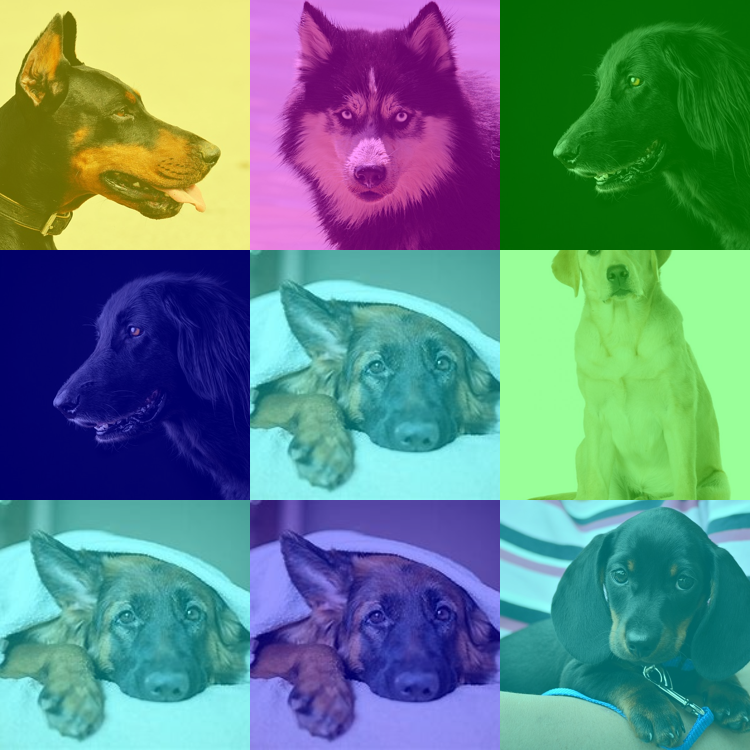

In [5]:
generate_poster(r'C:\Py\Lab4Images', "poster3x3.png", 3, 3)

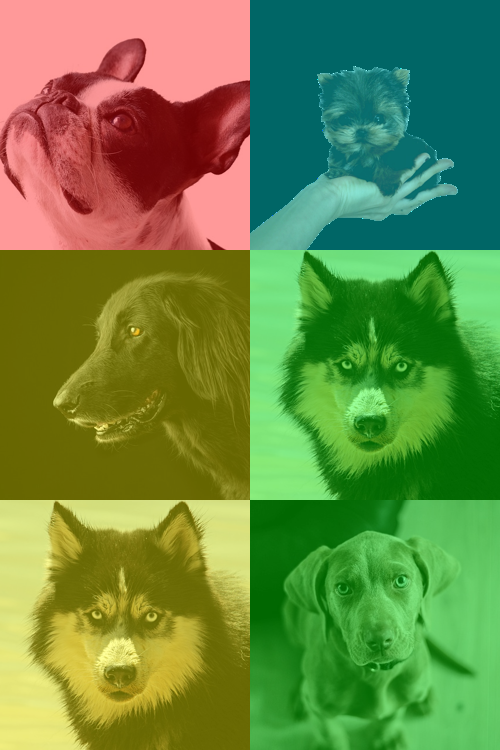

In [10]:
generate_poster(r'C:\Py\Lab4Images', "poster2x3.png", 2, 3)